In [10]:
# Initial code for processing data from CMIP6 ensemble for senior thesis project
# Author: Nathan Erickson
# Date: 9/13/2021
# Coded with Python 3.8.10

In [11]:
# Directory management

import os

dir = '/chinook2/nathane1/Thesis/CMIP6/'
model_list = ["ACCESS-CM2", "ACCESS-ESM1-5", "AWI-CM-1-1-MR", "BCC-CSM2-MR", "CAMS-CSM1-0", "CanESM5", "CESM2", "CESM2-WACCM", "CMCC-CM2-SR5", 
              "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", "EC-Earth3", "EC-Earth3-Veg", "FGOALS-f3-L", "FGOALS-g3", "GFDL-CM4", "GFDL-ESM4", 
              "GISS-E2-1-G", "HadGEM3-GC31-LL", "HadGEM3-GC31-MM", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", "MIROC-ES2L",
              "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MPI-ESM2-0", "NESM3", "NorESM2-LM", "NorESM2-MM", "TaiESM1"]
model = model_list[1]
path = dir + model
os.chdir(path)

#Set up time

import time
start_time = time.time()

In [12]:
# Import other important modules

import numpy as np
import pandas as pd
import xarray as xr
import cftime as cf
import warnings
from cmip6_processing import calculate_eli

#warnings.simplefilter("ignore","SerializationWarning:")

ModuleNotFoundError: No module named 'cmip6_processing'

In [4]:
# Read in files from working directory
# Read in model data

#data = xr.open_dataset(f'ts_Amon_{model}_histssp585_r1i1p1f1_gn_185001-210012.nc')
data = xr.open_dataset(f'ts_Amon_{model}_histssp585_r1i1p1f1_gn_185001-210012.nc')

# Read in land mask

land_mask = xr.open_dataset(f'sftlf_fx_{model}_historical_r1i1p1f1_gn.nc')

In [12]:
data.ts

<xarray.DataArray 'ts' (time: 3012, lat: 145, lon: 192)>
[83854080 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-15T03:52:23Z altered by CMOR: replaced missing va...

In [5]:
ts = data['ts']
lon = data['lon']
lat = data['lat']

In [6]:
# Perform land mask
land_masked = ts.where(land_mask['sftlf'] != 100)

12.018554210662842


In [7]:
# Define functions for calculation of ELI

# Slice data to include only between 5 S - 5 N and only equatorial Pacific

ts_pac = land_masked.sel(lon=slice(115,290),lat=slice(-5,5))
ts_tropics = land_masked.sel(lat=slice(-5,5))

16.486409902572632


In [2]:
# Binary spatial mask (1 = TS > threshold temperature; 0 = TS < threshold temperature)

monthly_averages = []
monthly_ELI = []

In [1]:
calculate_eli(ts_tropics,ts_pac)

NameError: name 'calculate_eli' is not defined

In [23]:
eli_output = pd.DataFrame()
eli_output.insert(0,model,monthly_ELI)
eli_output

ACCESS-CM2
0     160.152138
1     166.294095
2     165.533460
3     160.810096
4     175.054266
...          ...
3007  174.044643
3008  172.130248
3009  162.398844
3010  158.269768
3011  154.348404

[3012 rows x 1 columns]

Text(0.5, 1.0, 'ACCESS-CM2 ELI Time Series')

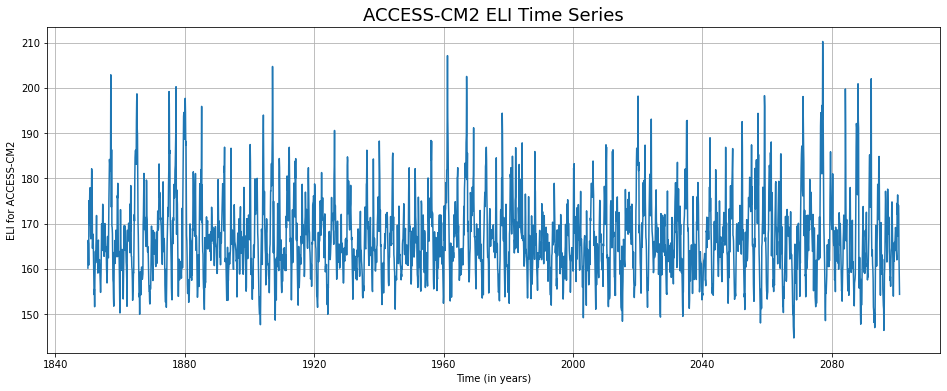

In [13]:
# Import modules and set up for plotting

import matplotlib.pyplot as plt
import matplotlib.lines as lines
import cartopy as cp
time_series = data['time']

#ELI_trend = np.polyfit(time.astype(float),monthly_ELI,1)
#trend = np.poly1d(ELI_trend)
plt.figure(figsize = (16,6))
ax = plt.axes()
ax.plot(time_series,monthly_ELI)
ax.set_xlabel('Time (in years)')
ax.set_ylabel(f'ELI for {model}') 
ax.grid()
ax.set_title(f'{model} ELI Time Series', size = 18, loc = 'center')

NameError: name 'trend' is not defined

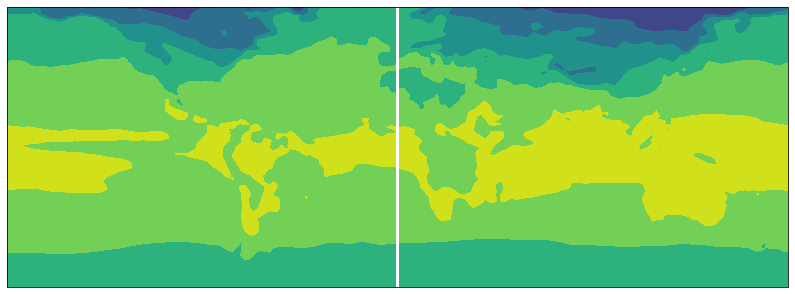

In [14]:
plt.figure(figsize=(14,6))
ax = plt.axes(projection=cp.crs.PlateCarree())
ax.set_global()
ax.contourf(lon,lat,ts[0])
#ax.coastlines()
ax.set_extent([290,115,-5,5])
#ax.add_feature(cp.feature.land, zorder=100, edgecolor='k')
ACCESS_line = lines.Line2D(range(len(trend)),trend)
#ax.add_line(ACCESS_line)